<h1 style="text-align: center; color: #000000; font-size: 38px; font-family: 'Courier New', monospace;">
  🚗  Machine Learning for Car Price Estimation | AutoScout24 Data
</h1>


<h1 style="text-align: center; color: #FF5733; font-size: 36px; font-family: 'Courier New', monospace;">
 About the Dataset
</h1>

- **Auto Scout** dataset was obtained in 2019 from the online car trading company [AutoScout24](https://www.autoscout24.com) and includes various features of 9 different car models.

- In this project, we will use a pre-processed and prepared dataset for the algorithms.

- The goal of this project is to understand machine learning algorithms. Therefore, since we are working with a clean dataset, we will not need an extensive EDA process.

- In this scenario, we will use regression algorithms to predict car prices.

- To get started, we will need to import the necessary libraries. We will also perform some preprocessing before moving on to modeling.

- Then, we will apply Linear Regression, Ridge Regression, Lasso Regression, and Elastic-Net algorithms, respectively.

- We can evaluate the performance of our models using regression error metrics and the cross-validation method.

- For better results, we will try to improve the performance of our models through hyperparameter tuning.

- We will identify the importance of features and optimize our model using only the most important ones to save resources.

- Finally, we will compare the performance of the algorithms.

- Additionally, you can focus more on the algorithm that achieves the most successful prediction rate.

**------------**

1. **make_model**: Contains the make and model information of the vehicles.
2. **body_type**: Indicates the body type of the vehicles (e.g., sedan, hatchback).
3. **price**: Contains the price information of the vehicles.
4. **vat**: Contains value-added tax (VAT) information (often important in vehicle sales).
5. **km**: Contains the mileage information of the vehicles.
6. **Type**: Indicates the type of the vehicle (e.g., new, used).
7. **Fuel**: Indicates the type of fuel used (e.g., petrol, diesel).
8. **Gears**: Contains the number of gears in the vehicles.
9. **Comfort_Convenience**: Contains the comfort and convenience features of the vehicles.
10. **Entertainment_Media**: Contains entertainment and media features.
11. **Extras**: Contains the extra features of the vehicles.
12. **Safety_Security**: Contains safety features.
13. **age**: The age of the vehicles.
14. **Previous_Owners**: Contains the number of previous owners of the vehicles.
15. **hp_kW**: Contains the horsepower of the vehicles in kilowatts.
16. **Inspection_new**: Contains information about whether the vehicle has a new inspection.
17. **Paint_Type**: Contains the type of paint of the vehicles.
18. **Upholstery_type**: Contains the type of upholstery in the vehicles.
19. **Gearing_Type**: Indicates the type of transmission in the vehicles.
20. **Displacement_cc**: Indicates the engine displacement in cubic centimeters (cc).
21. **Weight_kg**: Indicates the weight of the vehicles in kilograms.
22. **Drive_chain**: Indicates the type of drive train in the vehicles (e.g., front-wheel drive, rear-wheel drive).
23. **cons_comb**: Indicates the combined fuel consumption of the vehicles in liters per 100 kilometers.

<h1 style="text-align: center; color: #FF5733; font-size: 36px; font-family: 'Courier New', monospace;">
  Tasks
</h1>

- 1. Import Modules, Load Data and Data Review

- 2. EDA

- 3. Train | Test Split

- 4. Implement Linear Regression

- 5. Implement Ridge Regression

- 6. Implement Lasso Regression

- 7. Implement Elastic-Net

- 8. Visually Compare Models Performance In a Graph

- 9. Feature Importance

- 10. Compare Models Performance
 
- 11. Final Model

- 12. Prediction

<h1 style="text-align: center; color: #FF5733; font-size: 36px; font-family: 'Courier New', monospace;">
 Import Modules, Load Data and Data Review
</h1>


In [2]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)   
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)    
pd.options.display.float_format = '{:.3f}'.format

<h1 style="text-align: center; color: #FF5733; font-size: 36px; font-family: 'Courier New', monospace;">
  EDA
</h1>

In [52]:
df0 = pd.read_csv("final_scout_not_dummy.csv")
df = df0.copy()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [56]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.000,18024.381,7381.679,4950.000,12850.000,16900.000,21900.000,74600.000
km,15915.000,32089.996,36977.215,0.000,1920.500,20413.000,46900.000,317000.000
Gears,15915.000,5.937,0.705,5.000,5.000,6.000,6.000,8.000
age,15915.000,1.390,1.121,0.000,0.000,1.000,2.000,3.000
Previous_Owners,15915.000,1.043,0.339,0.000,1.000,1.000,1.000,4.000
hp_kW,15915.000,88.499,26.674,40.000,66.000,85.000,103.000,294.000
Inspection_new,15915.000,0.247,0.431,0.000,0.000,0.000,0.000,1.000
Displacement_cc,15915.000,1428.662,275.804,890.000,1229.000,1461.000,1598.000,2967.000
Weight_kg,15915.000,1337.701,199.682,840.000,1165.000,1295.000,1472.000,2471.000
cons_comb,15915.000,4.832,0.868,3.000,4.100,4.800,5.400,9.100


In [60]:
df.duplicated().sum()

1673

In [62]:
df[df.duplicated()]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
81,Audi A1,Sedans,18500,VAT deductible,13406.000,Used,Diesel,7.000,"Air conditioning,Armrest,Auxiliary heating,Ele...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Shift paddles...","Alarm system,Central door lock,Daytime running...",1.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
123,Audi A1,Sedans,18700,VAT deductible,27000.000,Employee's car,Diesel,7.000,"Air conditioning,Armrest,Cruise control,Electr...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1275.000,front,3.700
136,Audi A1,Compact,18333,VAT deductible,4800.000,Employee's car,Benzine,7.000,"Air conditioning,Electrical side mirrors,Hill ...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",1.000,1.000,70.000,1,Metallic,Cloth,Automatic,999.000,1165.000,front,4.400
287,Audi A1,Sedans,15090,VAT deductible,63668.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Part/Full Leather,Automatic,1598.000,1135.000,front,3.500
291,Audi A1,Sedans,15090,VAT deductible,63668.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Part/Full Leather,Automatic,1598.000,1135.000,front,3.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15889,Renault Espace,Van,42500,VAT deductible,10.000,Pre-registered,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.100
15897,Renault Espace,Van,41400,VAT deductible,10.000,Pre-registered,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",0.000,1.000,118.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.100
15910,Renault Espace,Van,39950,VAT deductible,1647.363,New,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300
15913,Renault Espace,Van,39700,VAT deductible,10.000,Pre-registered,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300


In [64]:
df.drop_duplicates(inplace=True)

In [66]:
df.duplicated().sum()

0

In [68]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [70]:
for col in df.select_dtypes("object"):
    print(f"{col:<20}",df[col].nunique())

make_model           9
body_type            8
vat                  2
Type                 5
Fuel                 4
Comfort_Convenience  6196
Entertainment_Media  346
Extras               659
Safety_Security      4442
Paint_Type           3
Upholstery_type      2
Gearing_Type         3
Drive_chain          3


In [72]:
df.make_model.value_counts()

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: count, dtype: int64

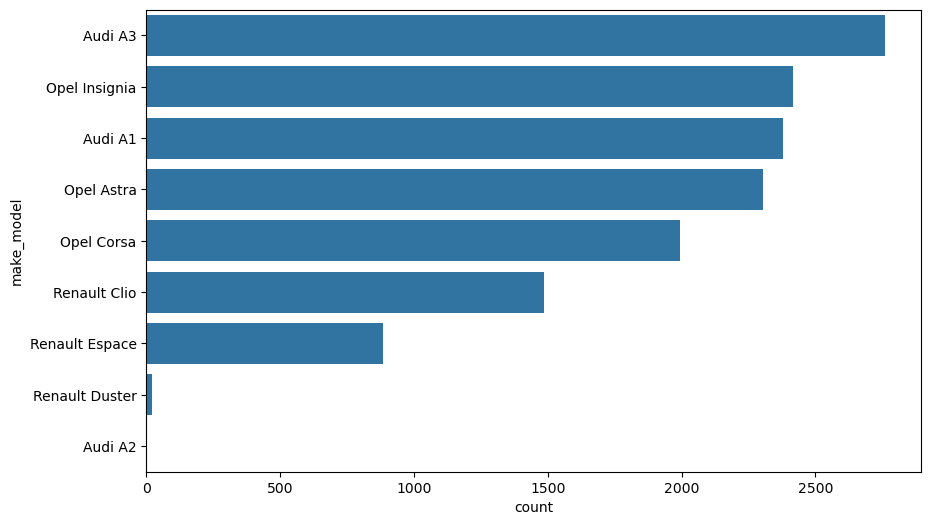

In [74]:
sns.barplot(x=df.make_model.value_counts(),y=df.make_model.value_counts().index);

In [76]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.000,Employee's car,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",1.000,1.000,85.000,0,Metallic,Cloth,Manual,1598.000,1135.000,front,4.900


In [78]:
df.drop(index=2614,inplace=True)

In [80]:
df.shape

(14241, 23)

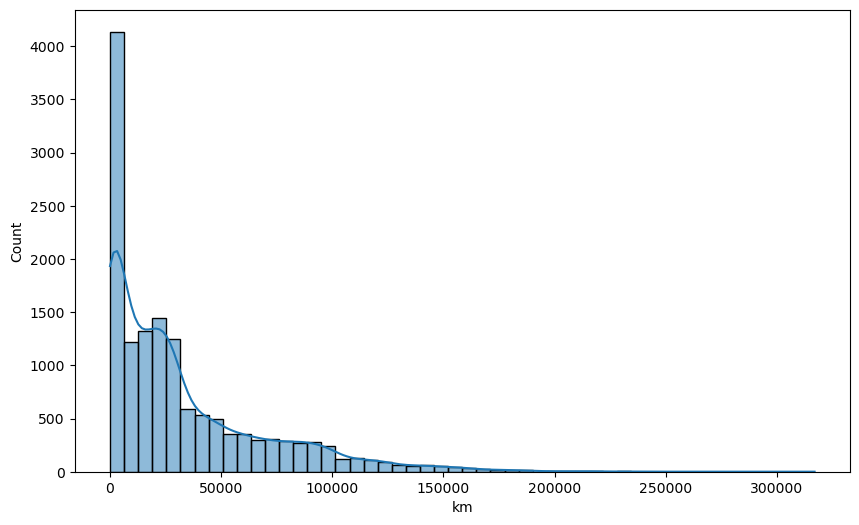

In [82]:
sns.histplot(df.km,bins=50,kde=True);

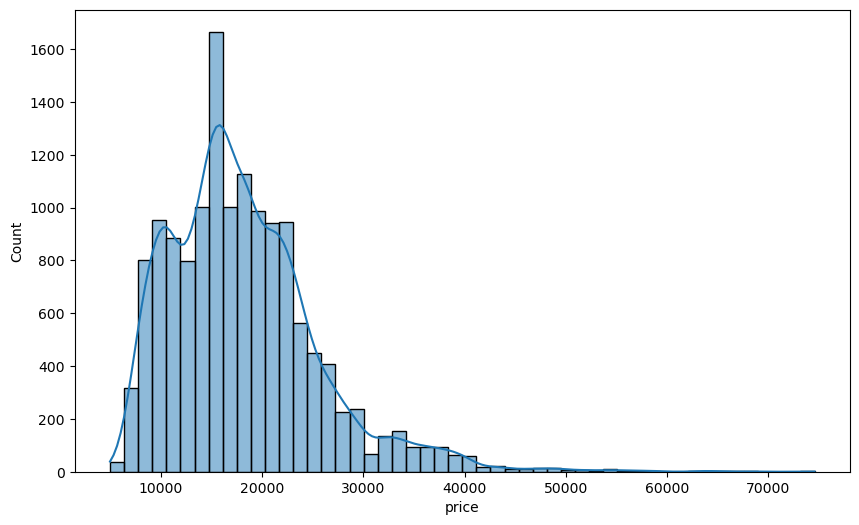

In [84]:
sns.histplot(df.price,bins=50,kde=True);

In [86]:
corr=df.select_dtypes(include="number").corr()
corr

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
price,1.000,-0.402,0.528,-0.481,-0.149,0.698,0.003,0.287,0.460,0.274
km,-0.402,1.000,-0.038,0.749,0.159,0.013,-0.036,0.306,0.153,-0.295
Gears,0.528,-0.038,1.000,-0.079,-0.037,0.451,-0.006,0.338,0.332,0.007
age,-0.481,0.749,-0.079,1.000,0.314,-0.093,-0.024,0.198,0.061,-0.339
Previous_Owners,-0.149,0.159,-0.037,0.314,1.000,-0.032,0.037,0.030,0.004,-0.033
hp_kW,0.698,0.013,0.451,-0.093,-0.032,1.000,0.045,0.606,0.641,0.391
Inspection_new,0.003,-0.036,-0.006,-0.024,0.037,0.045,1.000,-0.024,-0.041,0.142
Displacement_cc,0.287,0.306,0.338,0.198,0.030,0.606,-0.024,1.000,0.567,0.055
Weight_kg,0.460,0.153,0.332,0.061,0.004,0.641,-0.041,0.567,1.000,0.089
cons_comb,0.274,-0.295,0.007,-0.339,-0.033,0.391,0.142,0.055,0.089,1.000


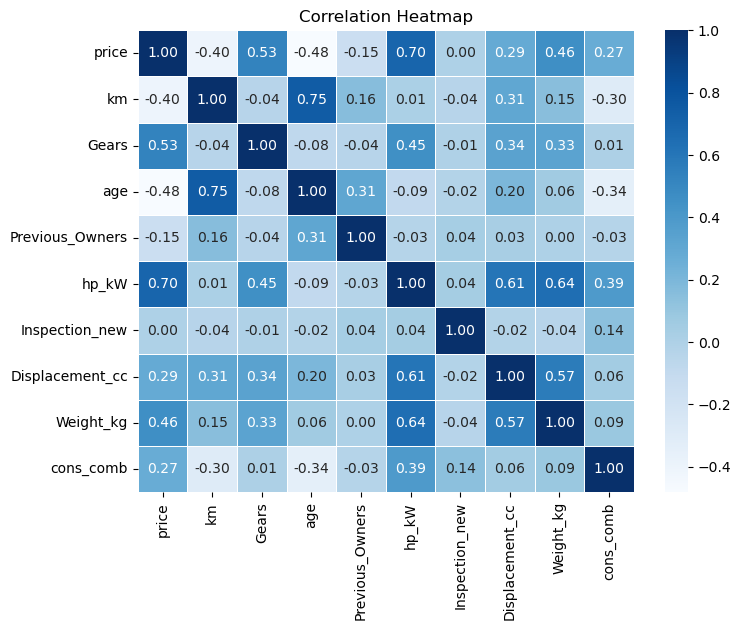

In [88]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [90]:
corr[(corr>=0.9) & (corr <1)].any().any()

False

In [92]:
corr[(corr <= -0.9) & (corr > -1)].any().any()

False

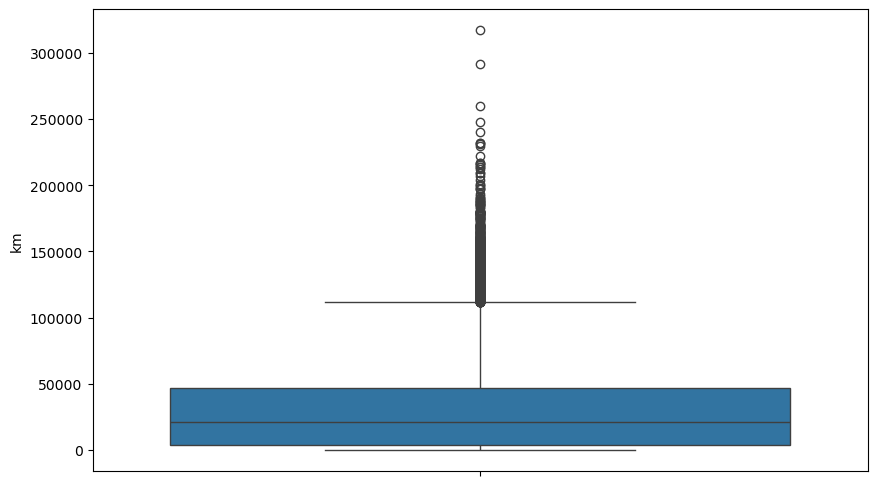

In [94]:
sns.boxplot(df.km);

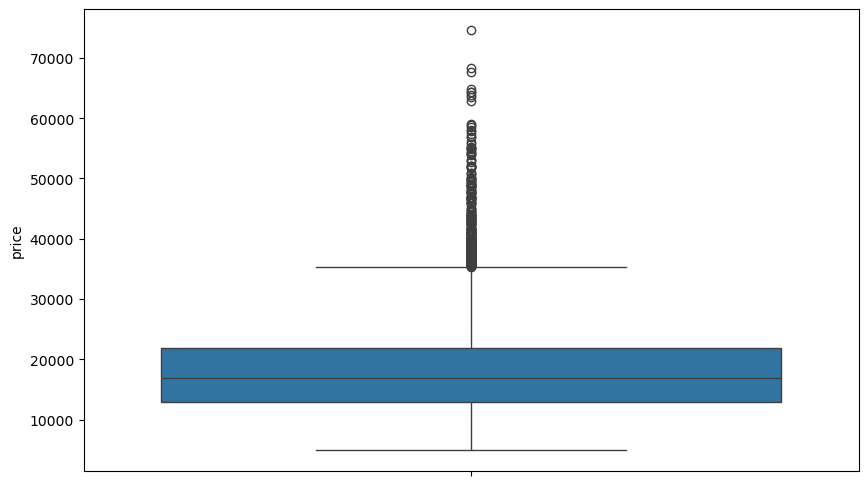

In [96]:
sns.boxplot(df.price);

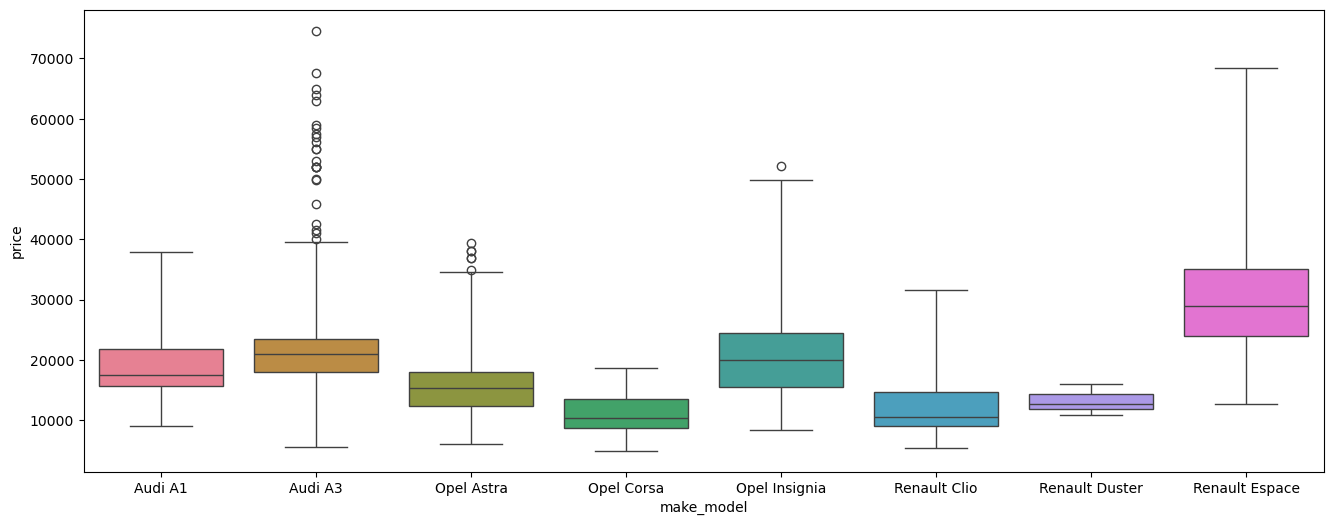

In [98]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3,palette="husl")
plt.show()

In [100]:
total_outliers = []

for model in df.make_model.unique():
    
    car_prices = df[df["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()    
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

 The count of outlier for Audi A1         : 5    ,           The rate of outliers : 0.002
 The count of outlier for Audi A3         : 56   ,           The rate of outliers : 0.02
 The count of outlier for Opel Astra      : 127  ,           The rate of outliers : 0.055
 The count of outlier for Opel Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outlier for Opel Insignia   : 109  ,           The rate of outliers : 0.045
 The count of outlier for Renault Clio    : 37   ,           The rate of outliers : 0.025
 The count of outlier for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Espace  : 20   ,           The rate of outliers : 0.023

Total_outliers :  354 The rate of total outliers : 0.025


In [102]:
df.sample(3)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
3958,Audi A3,Sedans,20000,VAT deductible,1647.363,New,Diesel,7.000,"Air conditioning,Armrest,Cruise control,Electr...","Bluetooth,CD player,Digital radio,Hands-free e...",Alloy wheels,"ABS,Adaptive Cruise Control,Adaptive headlight...",0.000,0.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1360.000,front,3.900
14331,Renault Clio,Sedans,9990,VAT deductible,6017.000,Used,Benzine,5.000,"Air conditioning,Cruise control,Electrical sid...","Hands-free equipment,MP3,Radio,USB",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",1.000,2.000,54.000,0,Metallic,Cloth,Manual,1149.000,1165.000,front,5.000
4091,Audi A3,Sedans,19500,VAT deductible,33000.000,Used,Diesel,6.000,"Air conditioning,Power windows,Seat ventilatio...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",2.000,2.000,85.000,0,Metallic,Cloth,Manual,1598.000,1335.000,front,4.000


In [104]:
df=df.join(df["Comfort_Convenience"].str.get_dummies(sep=",").add_prefix("cc_"))
df=df.join(df["Entertainment_Media"].str.get_dummies(sep=",").add_prefix("em_"))
df=df.join(df["Extras"].str.get_dummies(sep=",").add_prefix("ex_"))
df=df.join(df["Safety_Security"].str.get_dummies(sep=",").add_prefix("ss_"))

In [105]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"],inplace=True,axis=1)

In [108]:
df=pd.get_dummies(df,drop_first=True)

In [110]:
boolean_columns = df.columns[df.dtypes == "bool"]

df[boolean_columns] = df[boolean_columns].astype(int)

In [112]:
df.tail()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
15907,39980,100.000,6.000,0.000,1.000,118.000,0,1598.000,1734.000,4.700,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1,0,0,0,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,1,1,1,0,1,0,1,1,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0
15908,39950,1647.363,6.000,0.000,1.000,147.000,0,1997.000,1758.000,5.300,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0
15909,39950,1000.000,6.000,0.000,1.000,165.000,0,1798.000,1734.000,6.800,1,0,1,1,0,1,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,1,1,1,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15911,39885,9900.000,7.000,0.000,1.000,165.000,0,1798.000,1708.000,7.400,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
15912,39875,15.000,6.000,0.000,1.000,146.000,1,1997.000,1734.000,5.300,1,0,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1

In [114]:
df.shape

(14241, 133)

In [116]:
df.isnull().sum()

price                                       0
km                                          0
Gears                                       0
age                                         0
Previous_Owners                             0
hp_kW                                       0
Inspection_new                              0
Displacement_cc                             0
Weight_kg                                   0
cons_comb                                   0
cc_Air conditioning                         0
cc_Air suspension                           0
cc_Armrest                                  0
cc_Automatic climate control                0
cc_Auxiliary heating                        0
cc_Cruise control                           0
cc_Electric Starter                         0
cc_Electric tailgate                        0
cc_Electrical side mirrors                  0
cc_Electrically adjustable seats            0
cc_Electrically heated windshield           0
cc_Heads-up display               

In [118]:
corr_price=df.corr()["price"].sort_values()[:-1]
corr_price

age                                        -0.481
Gearing_Type_Manual                        -0.424
km                                         -0.402
make_model_Opel Corsa                      -0.384
Type_Used                                  -0.368
make_model_Renault Clio                    -0.281
Drive_chain_front                          -0.159
Previous_Owners                            -0.149
make_model_Opel Astra                      -0.130
em_CD player                               -0.107
ss_Central door lock with remote control   -0.084
em_On-board computer                       -0.067
body_type_Sedans                           -0.058
ss_Fog lights                              -0.054
ss_Power steering                          -0.053
ss_ABS                                     -0.048
ss_Central door lock                       -0.045
ss_Isofix                                  -0.045
ss_Head airbag                             -0.044
em_MP3                                     -0.044


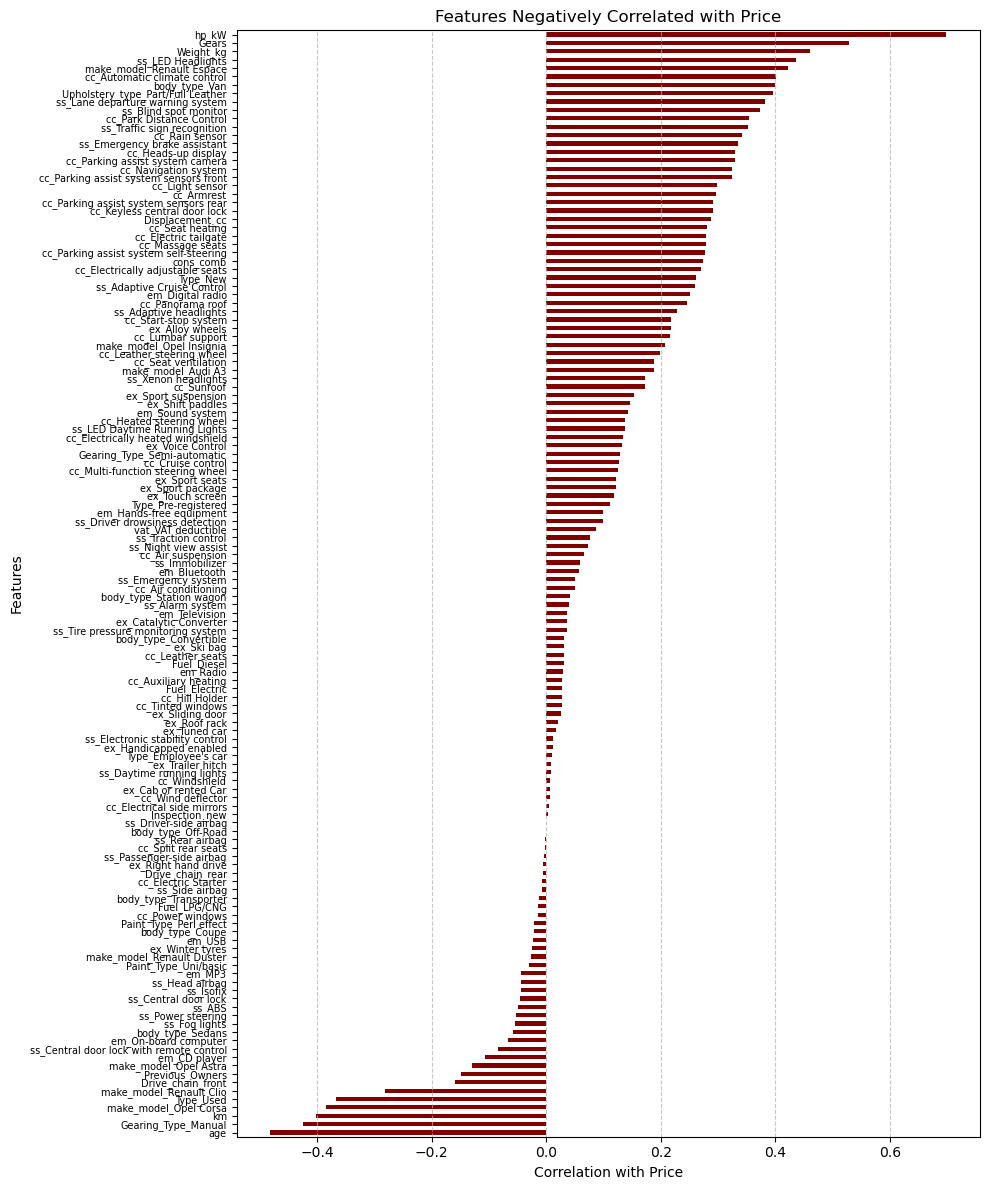

In [120]:
plt.figure(figsize=(10, 12))
corr_price.plot(kind='barh', color='maroon')
plt.title('Features Negatively Correlated with Price')
plt.xlabel('Correlation with Price')
plt.ylabel('Features')
plt.yticks(fontsize=7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h1 style="text-align: center; color: #FF5733; font-size: 36px; font-family: 'Courier New', monospace;">
  Train | Test Split
</h1>

In [123]:
X=df.drop(columns="price")
y=df.price

In [125]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [127]:
X_train.shape

(11392, 132)

In [129]:
X_test.shape

(2849, 132)

<h1 style="text-align: center; color: #FF5733; font-size: 36px; font-family: 'Courier New', monospace;">
  Implement Linear Regression
</h1>

In [132]:
from sklearn.linear_model import LinearRegression

In [134]:
lm=LinearRegression()

In [136]:
lm.fit(X_train,y_train)

LinearRegression()

In [138]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {
    "train": {
    "R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {
    "R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
               }
    
    return pd.DataFrame(scores)

In [140]:
train_val(lm,X_train, y_train, X_test, y_test)

,train,test
R2,0.890,0.884
mae,1718.455,1725.509
mse,6088991.592,6259304.583
rmse,2467.588,2501.860


In [142]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)    
    n = df.shape[0]                     
    p = df.shape[1]-1                   
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)   
    return adj_r2

In [144]:
y_pred = lm.predict(X_test)

In [146]:
adj_r2(y_test, y_pred, df)

0.882849260206431

In [148]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
             cv =10, return_train_score=True)

In [150]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.034,0.007,0.891,0.890,-1719.520,-1726.579,-5955906.000,-6117627.014,-2440.472,-2473.384
1,0.033,0.005,0.880,0.891,-1809.082,-1704.708,-7372596.768,-5977292.841,-2715.253,-2444.850
2,0.035,0.004,0.903,0.888,-1675.348,-1720.954,-5852367.067,-6129630.619,-2419.167,-2475.809
3,0.032,0.005,0.882,0.890,-1676.788,-1734.738,-5171070.062,-6204713.938,-2273.999,-2490.926
4,0.034,0.005,0.878,0.891,-1824.524,-1712.041,-6594274.312,-6044960.879,-2567.932,-2458.650
5,0.039,0.005,0.887,0.890,-1728.856,-1716.903,-5977848.111,-6116207.179,-2444.964,-2473.097
6,0.033,0.004,0.878,0.891,-1754.029,-1712.446,-6882980.534,-6014497.082,-2623.544,-2452.447
7,0.033,0.005,0.886,0.890,-1764.317,-1714.978,-6244001.052,-6083169.222,-2498.800,-2466.408
8,0.035,0.005,0.876,0.891,-1823.994,-1706.043,-7228938.810,-5972788.307,-2688.669,-2443.929
9,0.032,0.005,0.893,0.889,-1678.446,-1723.104,-6021675.578,-6108254.926,-2453.910,-2471.488


In [152]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.885
train_r2                                   0.890
test_neg_mean_absolute_error           -1745.491
train_neg_mean_absolute_error          -1717.249
test_neg_mean_squared_error         -6330165.829
train_neg_mean_squared_error        -6076914.201
test_neg_root_mean_squared_error       -2512.671
train_neg_root_mean_squared_error      -2465.099
dtype: float64

In [154]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.890,0.884
mae,1718.455,1725.509
mse,6088991.592,6259304.583
rmse,2467.588,2501.860


In [156]:
2501/df.price.mean()

0.13817480842212715

In [158]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

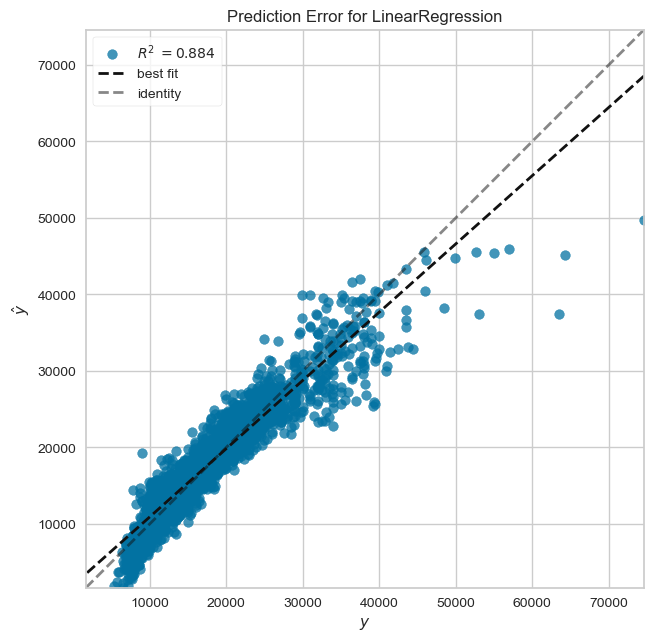

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [159]:
visualizer=RadViz(size=(720,3000))
model=LinearRegression()
visualizer=PredictionError(model)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.show()

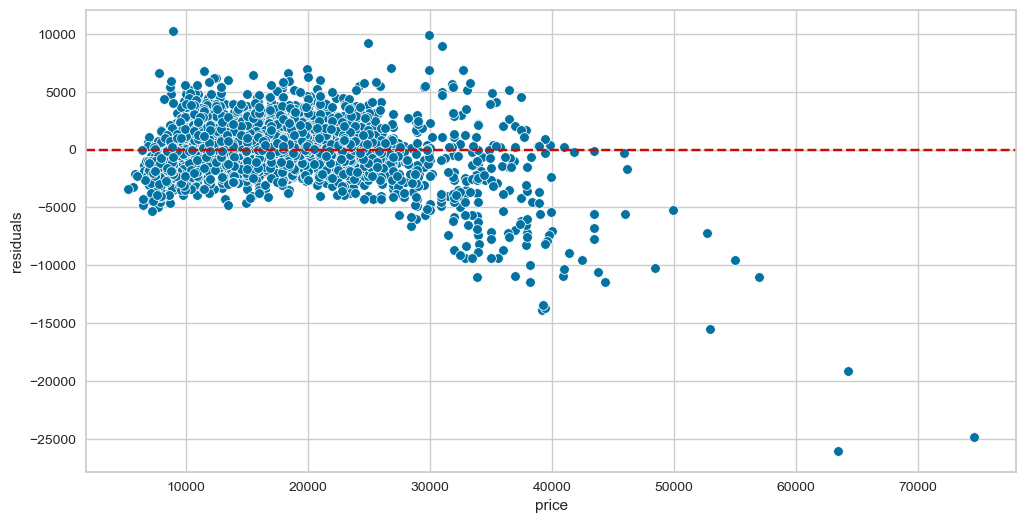

In [160]:
plt.figure(figsize=(12, 6))
residuals = y_test-y_pred

sns.scatterplot(x=y_test,y=-residuals)
plt.axhline(y=0,color="r",linestyle="--")
plt.ylabel("residuals")
plt.show()

In [162]:
df1=df[~(df["price"]>35000)]
df1.sample(10)

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
8502,11450,24330.000,6.000,2.000,1.000,66.000,1,1398.000,1163.000,5.200,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
9150,8699,34980.000,5.000,2.000,1.000,52.000,0,1229.000,1088.000,5.300,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3753,21990,1647.363,7.000,0.000,1.000,85.000,0,999.000,1365.000,4.500,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
11228,14990,33000.000,6.000,3.000,2.000,88.000,0,1598.000,1487.000,4.100,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0
10665,13970,81279.000,6.000,3.000,1.000,100.000,1,1598.000,1487.000,5.600,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1

In [164]:
df0[df0.price>3500].groupby("make_model").count().iloc[:,0]

make_model
Audi A1           2614
Audi A2              1
Audi A3           3097
Opel Astra        2525
Opel Corsa        2216
Opel Insignia     2598
Renault Clio      1839
Renault Duster      34
Renault Espace     991
Name: body_type, dtype: int64

In [168]:
df0.make_model.value_counts()

make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: count, dtype: int64

In [170]:
X=df1.drop(columns="price")
y=df1.price

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [172]:
lm2=LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

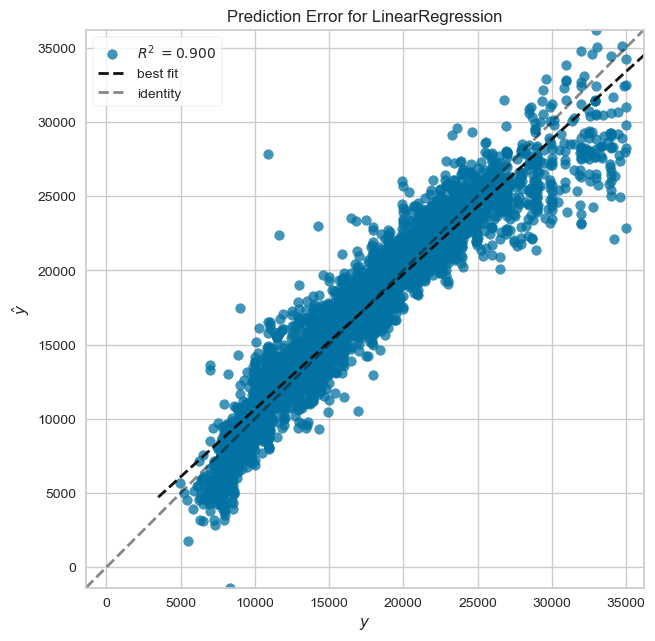

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [174]:
visualizer=RadViz(size=(720,3000))
model=LinearRegression()
visualizer=PredictionError(model)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.show()

In [176]:
train_val(lm2,X_train,y_train,X_test,y_test)

,train,test
R2,0.896,0.900
mae,1427.025,1394.626
mse,3860692.678,3704430.159
rmse,1964.865,1924.690


In [178]:
1924/df1.price.mean()

0.11110754262710157

In [180]:
2501/df.price.mean()

0.13817480842212715

In [182]:
y_pred=lm2.predict(X_test)
y_pred

array([23567.56242189,  5033.12475447, 18373.61262086, ...,
       20134.84035164,  7334.35010697, 16331.41949558])

In [184]:
lm2_r2=r2_score(y_test,y_pred)
lm2_mae=mean_absolute_error(y_test,y_pred)
lm2_rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [186]:
my_dict={"Actual":y_test,"Predict":y_pred,"Residuals":y_test-y_pred}
comparison=pd.DataFrame(my_dict)

In [188]:
comp=comparison.sample(10)
comp

,Actual,Predict,Residuals
14475,10000,10209.203,-209.203
14727,11490,12262.668,-772.668
8278,13290,12101.413,1188.587
12238,20171,22224.228,-2053.228
8363,12880,12751.546,128.454
1890,24706,25563.411,-857.411
1338,15840,16933.126,-1093.126
10752,11700,14184.959,-2484.959
2968,14600,15121.957,-521.957
10109,15199,15671.497,-472.497


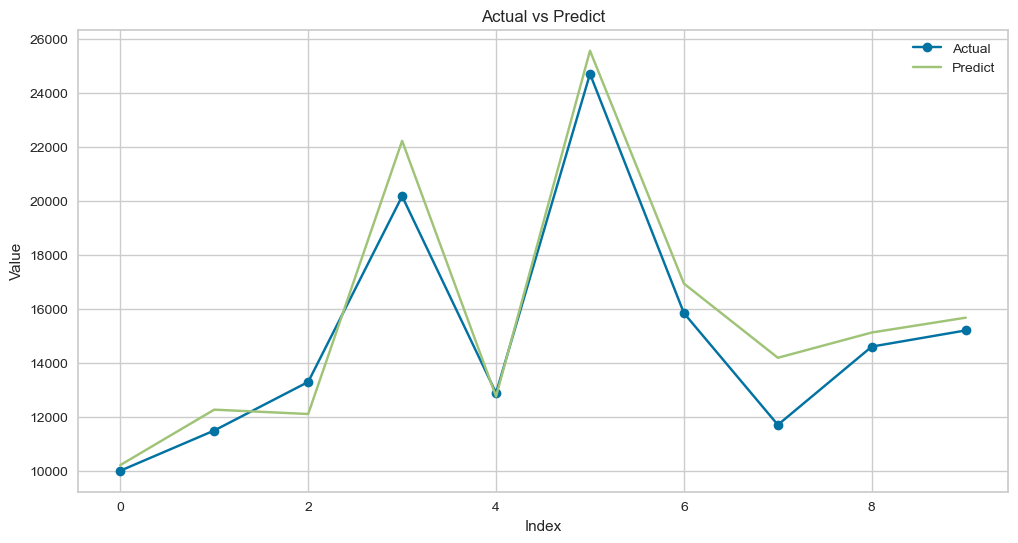

In [190]:
plt.figure(figsize=(12, 6))
plt.plot(comp["Actual"].values, label="Actual", marker='o')
plt.plot(comp["Predict"].values, label="Predict", marker='x')
plt.title("Actual vs Predict")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


In [192]:
pd.DataFrame(lm2.coef_,index=X.columns,columns=["coef"]).sort_values(by="coef")

,coef
make_model_Renault Duster,-9238.117
make_model_Renault Clio,-5364.903
make_model_Opel Corsa,-5270.450
make_model_Opel Astra,-3305.729
Type_Employee's car,-2105.201
Type_Used,-2052.336
Drive_chain_rear,-1724.689
Gearing_Type_Manual,-1576.434
age,-1460.021
Type_Pre-registered,-1443.288


<h1 style="text-align: center; color: #FF5733; font-size: 36px; font-family: 'Courier New', monospace;">
  Implement Ridge Regression
</h1>

In [195]:
scaler=MinMaxScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [197]:
from sklearn.linear_model import Ridge

In [199]:
ridge_model=Ridge(alpha=1,random_state=42)

In [201]:
ridge_model.fit(X_train_scaled,y_train)

Ridge(alpha=1, random_state=42)

In [203]:
train_val(ridge_model,X_train_scaled,y_train,X_test_scaled,y_test)

,train,test
R2,0.896,0.900
mae,1426.801,1394.299
mse,3863020.611,3704011.922
rmse,1965.457,1924.581


In [205]:
from sklearn.model_selection import GridSearchCV

In [207]:
alpha_space=np.linspace(0.01,50,100)
alpha_space

array([1.00000000e-02, 5.14949495e-01, 1.01989899e+00, 1.52484848e+00,
       2.02979798e+00, 2.53474747e+00, 3.03969697e+00, 3.54464646e+00,
       4.04959596e+00, 4.55454545e+00, 5.05949495e+00, 5.56444444e+00,
       6.06939394e+00, 6.57434343e+00, 7.07929293e+00, 7.58424242e+00,
       8.08919192e+00, 8.59414141e+00, 9.09909091e+00, 9.60404040e+00,
       1.01089899e+01, 1.06139394e+01, 1.11188889e+01, 1.16238384e+01,
       1.21287879e+01, 1.26337374e+01, 1.31386869e+01, 1.36436364e+01,
       1.41485859e+01, 1.46535354e+01, 1.51584848e+01, 1.56634343e+01,
       1.61683838e+01, 1.66733333e+01, 1.71782828e+01, 1.76832323e+01,
       1.81881818e+01, 1.86931313e+01, 1.91980808e+01, 1.97030303e+01,
       2.02079798e+01, 2.07129293e+01, 2.12178788e+01, 2.17228283e+01,
       2.22277778e+01, 2.27327273e+01, 2.32376768e+01, 2.37426263e+01,
       2.42475758e+01, 2.47525253e+01, 2.52574747e+01, 2.57624242e+01,
       2.62673737e+01, 2.67723232e+01, 2.72772727e+01, 2.77822222e+01,
      

In [209]:
ridge_model=Ridge(random_state=42)

In [211]:
param_grid={"alpha":alpha_space}

In [213]:
grid_ridge_model=GridSearchCV(estimator=ridge_model,
                             param_grid=param_grid,
                             scoring="neg_root_mean_squared_error",
                             cv=10,
                             n_jobs=-1)

In [215]:
grid_ridge_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-02, 5.14949495e-01, 1.01989899e+00, 1.52484848e+00,
       2.02979798e+00, 2.53474747e+00, 3.03969697e+00, 3.54464646e+00,
       4.04959596e+00, 4.55454545e+00, 5.05949495e+00, 5.56444444e+00,
       6.06939394e+00, 6.57434343e+00, 7.07929293e+00, 7.58424242e+00,
       8.08919192e+00, 8.5941...
       3.83861616e+01, 3.88911111e+01, 3.93960606e+01, 3.99010101e+01,
       4.04059596e+01, 4.09109091e+01, 4.14158586e+01, 4.19208081e+01,
       4.24257576e+01, 4.29307071e+01, 4.34356566e+01, 4.39406061e+01,
       4.44455556e+01, 4.49505051e+01, 4.54554545e+01, 4.59604040e+01,
       4.64653535e+01, 4.69703030e+01, 4.74752525e+01, 4.79802020e+01,
       4.84851515e+01, 4.89901010e+01, 4.94950505e+01, 5.00000000e+01])},
             scoring='neg_root_mean_squared_error')

In [216]:
grid_ridge_model.best_params_

{'alpha': 1.0198989898989899}

In [217]:
grid_ridge_model.best_estimator_

Ridge(alpha=1.0198989898989899, random_state=42)

In [221]:
pd.DataFrame(grid_ridge_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.069,0.005,0.002,0.000,0.010,{'alpha': 0.01},-2082.498,-1879.044,-2043.975,-2033.483,-1939.488,-2068.955,-1912.406,-1908.126,-2041.366,-2108.090,-2001.743,78.984,4
1,0.050,0.009,0.002,0.001,0.515,{'alpha': 0.5149494949494949},-2080.494,-1878.517,-2044.000,-2029.842,-1940.367,-2069.383,-1910.461,-1909.121,-2039.767,-2109.409,-2001.136,78.898,2
2,0.052,0.011,0.002,0.001,1.020,{'alpha': 1.0198989898989899},-2079.507,-1878.468,-2044.307,-2027.283,-1941.655,-2070.209,-1910.320,-1910.173,-2038.631,-2110.671,-2001.123,78.722,1
3,0.049,0.005,0.003,0.003,1.525,{'alpha': 1.5248484848484847},-2079.089,-1878.746,-2044.784,-2025.490,-1943.184,-2071.272,-1911.187,-1911.274,-2037.809,-2111.868,-2001.470,78.487,3
4,0.049,0.004,0.002,0.001,2.030,{'alpha': 2.0297979797979795},-2079.038,-1879.258,-2045.376,-2024.257,-1944.868,-2072.501,-1912.640,-1912.418,-2037.231,-2113.003,-2002.059,78.221,5
5,0.046,0.002,0.002,0.000,2.535,{'alpha': 2.5347474747474745},-2079.244,-1879.940,-2046.055,-2023.448,-1946.654,-2073.855,-1914.439,-1913.598,-2036.854,-2114.087,-2002.817,77.940,6
6,0.054,0.013,0.002,0.001,3.040,{'alpha': 3.039696969696969},-2079.638,-1880.752,-2046.800,-2022.967,-1948.511,-2075.309,-1916.446,-1914.809,-2036.647,-2115.129,-2003.701,77.654,7
7,0.052,0.007,0.002,0.002,3.545,{'alpha': 3.544646464646464},-2080.177,-1881.661,-2047.600,-2022.746,-1950.415,-2076.841,-1918.573,-1916.048,-2036.587,-2116.136,-2004.679,77.372,8
8,0.049,0.004,0.002,0.001,4.050,{'alpha': 4.049595959595959},-2080.831,-1882.647,-2048.445,-2022.733,-1952.350,-2078.438,-1920.767,-1917.310,-2036.656,-2117.114,-2005.729,77.097,9
9,0.047,0.005,0.002,0.001,4.555,{'alpha': 4.554545454545454},-2081.577,-1883.693,-2049.327,-2022.889,-1954.303,-2080.087,-1922.993,-1918.591,-2036.838,-2118.070,-2006.837,76.830,10


In [223]:
grid_ridge_model.best_index_

2

In [225]:
train_val(grid_ridge_model,X_train_scaled,y_train,X_test_scaled,y_test)

,train,test
R2,0.896,0.900
mae,1426.803,1394.300
mse,3863103.581,3704052.902
rmse,1965.478,1924.592


In [227]:
y_pred=grid_ridge_model.predict(X_test_scaled)
grid_ridge_r2=r2_score(y_test,y_pred)
grid_ridge_mae=mean_absolute_error(y_test,y_pred)
grid_ridge_rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [229]:
ridge=Ridge(alpha=1.01,random_state=42).fit(X_train_scaled,y_train)

pd.DataFrame(ridge.coef_,index=X.columns,columns=["coef"]).sort_values(by="coef")

,coef
km,-10319.922
make_model_Renault Duster,-8008.548
make_model_Renault Clio,-5343.051
make_model_Opel Corsa,-5307.692
age,-4423.053
make_model_Opel Astra,-3261.756
Type_Employee's car,-2084.476
Type_Used,-2036.690
Gearing_Type_Manual,-1597.347
Type_Pre-registered,-1417.679


<h1 style="text-align: center; color: #FF5733; font-size: 36px; font-family: 'Courier New', monospace;">
  Implement Lasso Regression
</h1>

In [232]:
from sklearn.linear_model import Lasso

In [234]:
lasso_model=Lasso(alpha=1,random_state=42)

In [236]:
lasso_model.fit(X_train_scaled,y_train)

Lasso(alpha=1, random_state=42)

In [238]:
train_val(lasso_model,X_train_scaled,y_train,X_test_scaled,y_test)

,train,test
R2,0.896,0.900
mae,1427.784,1392.398
mse,3875699.802,3687756.347
rmse,1968.680,1920.353


In [240]:
lasso_model=Lasso(random_state=42)

param_grid={"alpha":alpha_space}

grid_lasso_model=GridSearchCV(estimator=lasso_model,
                             param_grid=param_grid,
                             scoring="neg_root_mean_squared_error",
                             cv=10,
                             n_jobs=-1)

In [242]:
grid_lasso_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-02, 5.14949495e-01, 1.01989899e+00, 1.52484848e+00,
       2.02979798e+00, 2.53474747e+00, 3.03969697e+00, 3.54464646e+00,
       4.04959596e+00, 4.55454545e+00, 5.05949495e+00, 5.56444444e+00,
       6.06939394e+00, 6.57434343e+00, 7.07929293e+00, 7.58424242e+00,
       8.08919192e+00, 8.5941...
       3.83861616e+01, 3.88911111e+01, 3.93960606e+01, 3.99010101e+01,
       4.04059596e+01, 4.09109091e+01, 4.14158586e+01, 4.19208081e+01,
       4.24257576e+01, 4.29307071e+01, 4.34356566e+01, 4.39406061e+01,
       4.44455556e+01, 4.49505051e+01, 4.54554545e+01, 4.59604040e+01,
       4.64653535e+01, 4.69703030e+01, 4.74752525e+01, 4.79802020e+01,
       4.84851515e+01, 4.89901010e+01, 4.94950505e+01, 5.00000000e+01])},
             scoring='neg_root_mean_squared_error')

In [243]:
grid_lasso_model.best_params_

{'alpha': 1.0198989898989899}

In [244]:
grid_lasso_model.best_estimator_

Lasso(alpha=1.0198989898989899, random_state=42)

In [248]:
y_pred=grid_lasso_model.predict(X_test_scaled)

grid_lasso_r2=r2_score(y_test,y_pred)
grid_lasso_mae=mean_absolute_error(y_test,y_pred)
grid_lasso_rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [250]:
train_val(grid_lasso_model,X_train_scaled,y_train,X_test_scaled,y_test)

,train,test
R2,0.896,0.900
mae,1427.831,1392.368
mse,3876181.276,3687727.902
rmse,1968.802,1920.346


In [252]:
lasso=Lasso(alpha=1.01,random_state=42).fit(X_train_scaled,y_train)
pd.DataFrame(lasso.coef_,index=X.columns,columns=["coef"]).sort_values(by="coef")

,coef
km,-10357.712
make_model_Renault Duster,-7106.346
make_model_Renault Clio,-5292.414
make_model_Opel Corsa,-5273.369
age,-4432.790
make_model_Opel Astra,-3249.568
Type_Employee's car,-1999.478
Type_Used,-1959.681
Gearing_Type_Manual,-1613.652
Type_Pre-registered,-1322.679


<h1 style="text-align: center; color: #FF5733; font-size: 36px; font-family: 'Courier New', monospace;">
  Implement Elastic-Net
</h1>

In [255]:
from sklearn.linear_model import ElasticNet

In [257]:
elastic_model=ElasticNet(random_state=42)
elastic_model.fit(X_train_scaled,y_train)

ElasticNet(random_state=42)

In [259]:
train_val(elastic_model,X_train_scaled,y_train,X_test_scaled,y_test)

,train,test
R2,0.582,0.597
mae,3100.631,3056.145
mse,15515682.191,14918114.790
rmse,3938.995,3862.398


In [261]:
elastic_model=ElasticNet(random_state=42)

param_grid={"alpha":[1.01,1.50,1.75,2,3,3.5],
            "l1_ratio":[0.2,0.3,0.7,0.8,0.9,1,1.5,2,2.5]}

grid_elastic_model=GridSearchCV(estimator=elastic_model,
                               param_grid=param_grid,
                               scoring="neg_root_mean_squared_error",
                               cv=10,
                               n_jobs=-1)

In [263]:
grid_elastic_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': [1.01, 1.5, 1.75, 2, 3, 3.5],
                         'l1_ratio': [0.2, 0.3, 0.7, 0.8, 0.9, 1, 1.5, 2, 2.5]},
             scoring='neg_root_mean_squared_error')

In [264]:
grid_elastic_model.best_params_

{'alpha': 1.01, 'l1_ratio': 1}

In [265]:
grid_elastic_model.best_estimator_

ElasticNet(alpha=1.01, l1_ratio=1, random_state=42)

In [269]:
train_val(grid_elastic_model,X_train_scaled,y_train,X_test_scaled,y_test)

,train,test
R2,0.896,0.900
mae,1427.808,1392.383
mse,3875940.575,3687740.725
rmse,1968.741,1920.349


In [271]:
y_pred=grid_elastic_model.predict(X_test_scaled)

grid_elastic_r2=r2_score(y_test,y_pred)
grid_elastic_mae=mean_absolute_error(y_test,y_pred)
grid_elastic_rmse=np.sqrt(mean_squared_error(y_test,y_pred))

<h1 style="text-align: center; color: #FF5733; font-size: 36px; font-family: 'Courier New', monospace;">
  Feature Importance
</h1>

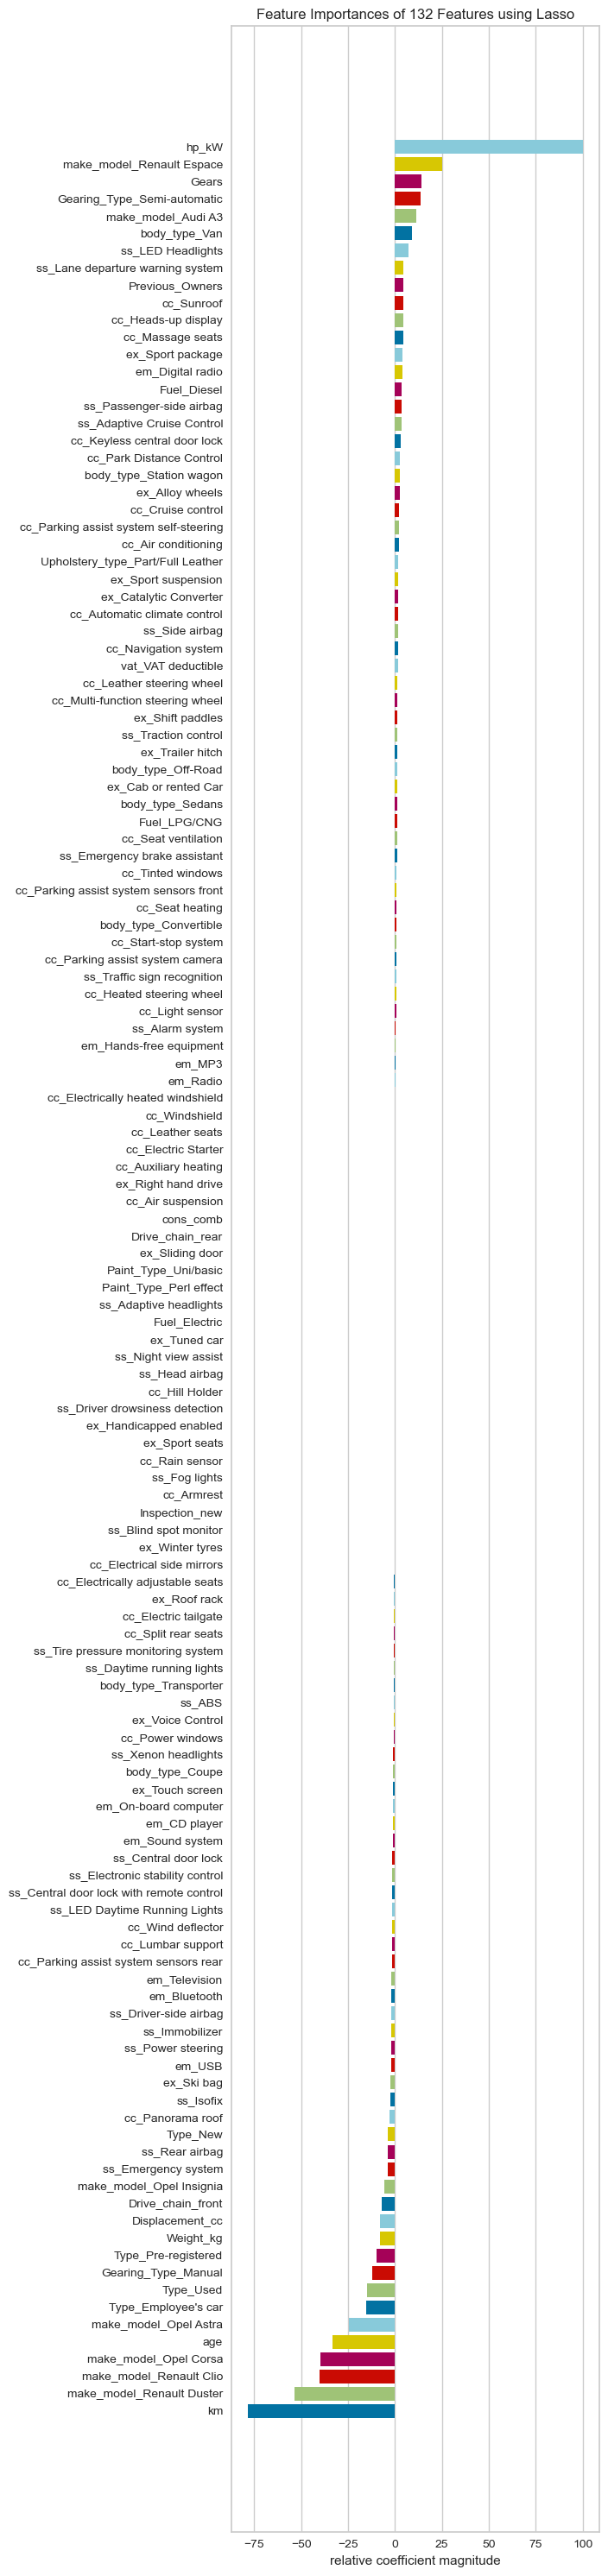

<Axes: title={'center': 'Feature Importances of 132 Features using Lasso'}, xlabel='relative coefficient magnitude'>

In [274]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz=FeatureImportances(Lasso(alpha=1.01),labels=X_train.columns)
visualizer=RadViz(size=(720,3000))
viz.fit(X_train_scaled,y_train)
viz.show()

In [275]:
new_df=df0[["make_model","hp_kW","km","age","Gearing_Type","price"]]
new_df.sample(5)

,make_model,hp_kW,km,age,Gearing_Type,price
12478,Opel Insignia,147.000,3.000,0.000,Automatic,33990
7235,Opel Astra,110.000,5.000,0.000,Automatic,17900
13496,Renault Clio,67.000,143258.000,3.000,Manual,8490
4193,Audi A3,85.000,19000.000,2.000,Manual,18990
10288,Opel Corsa,51.000,51.000,0.000,Manual,10141


In [277]:
new_df[new_df["make_model"]=="Audi A2"]

,make_model,hp_kW,km,age,Gearing_Type,price
2614,Audi A2,85.000,26166.000,1.000,Manual,28200


In [280]:
new_df.drop(index=2614,inplace=True)

In [282]:
new_df=new_df[~(new_df.price>35000)]

In [284]:
new_df=pd.get_dummies(new_df)
new_df.head()

,hp_kW,km,age,price,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,15770,True,False,False,False,False,False,False,False,True,False,False
1,141.000,80000.000,2.000,14500,True,False,False,False,False,False,False,False,True,False,False
2,85.000,83450.000,3.000,14640,True,False,False,False,False,False,False,False,True,False,False
3,66.000,73000.000,3.000,14500,True,False,False,False,False,False,False,False,True,False,False
4,66.000,16200.000,3.000,16790,True,False,False,False,False,False,False,False,True,False,False


In [286]:
len(new_df)

15419

In [288]:
X=new_df.drop(columns=["price"])
y=new_df.price

In [290]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [292]:
scaler=MinMaxScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [294]:
lasso_model=Lasso(random_state=42)

param_grid={"alpha":alpha_space}

final_lasso_model=GridSearchCV(estimator=lasso_model,
                              param_grid=param_grid,
                              scoring="neg_root_mean_squared_error",
                              cv=10,
                              n_jobs=-1)

In [296]:
final_lasso_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-02, 5.14949495e-01, 1.01989899e+00, 1.52484848e+00,
       2.02979798e+00, 2.53474747e+00, 3.03969697e+00, 3.54464646e+00,
       4.04959596e+00, 4.55454545e+00, 5.05949495e+00, 5.56444444e+00,
       6.06939394e+00, 6.57434343e+00, 7.07929293e+00, 7.58424242e+00,
       8.08919192e+00, 8.5941...
       3.83861616e+01, 3.88911111e+01, 3.93960606e+01, 3.99010101e+01,
       4.04059596e+01, 4.09109091e+01, 4.14158586e+01, 4.19208081e+01,
       4.24257576e+01, 4.29307071e+01, 4.34356566e+01, 4.39406061e+01,
       4.44455556e+01, 4.49505051e+01, 4.54554545e+01, 4.59604040e+01,
       4.64653535e+01, 4.69703030e+01, 4.74752525e+01, 4.79802020e+01,
       4.84851515e+01, 4.89901010e+01, 4.94950505e+01, 5.00000000e+01])},
             scoring='neg_root_mean_squared_error')

In [298]:
final_lasso_model.best_params_

{'alpha': 0.01}

In [300]:
final_lasso_model.best_estimator_

Lasso(alpha=0.01, random_state=42)

In [302]:
final_lasso_model.best_score_

-2239.588352950935

In [304]:
train_val(final_lasso_model,X_train_scaled,y_train,X_test_scaled,y_test)

,train,test
R2,0.867,0.877
mae,1611.742,1553.998
mse,5007030.903,4547724.302
rmse,2237.640,2132.539


In [306]:
2132/df.price.mean()

0.11778836127787888

In [308]:
y_pred = final_lasso_model.predict(X_test_scaled)
final_lasso_r2 = r2_score(y_test, y_pred)
final_lasso_mae = mean_absolute_error(y_test, y_pred)
final_lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

<h1 style="text-align: center; color: #FF5733; font-size: 36px; font-family: 'Courier New', monospace;">
  Compare Models Performance
</h1>

In [311]:
scores = {
    "linear_m": {
        "r2_score": lm2_r2,
        "mae": lm2_mae,
        "rmse": lm2_rmse
    },
    "ridge_m": {
        "r2_score": grid_ridge_r2,
        "mae": grid_ridge_mae,
        "rmse": grid_ridge_rmse
    },
    "lasso_m": {
        "r2_score": grid_lasso_r2,
        "mae": grid_lasso_mae,
        "rmse": grid_lasso_rmse
    },
    "elastic_m": {
        "r2_score": grid_elastic_r2,
        "mae": grid_elastic_mae,
        "rmse": grid_elastic_rmse
    },
    "final_m": {
        "r2_score": final_lasso_r2,
        "mae": final_lasso_mae,
        "rmse": final_lasso_rmse
    }
}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.900,1394.626,1924.690
ridge_m,0.900,1394.300,1924.592
lasso_m,0.900,1392.368,1920.346
elastic_m,0.900,1392.383,1920.349
final_m,0.877,1553.998,2132.539


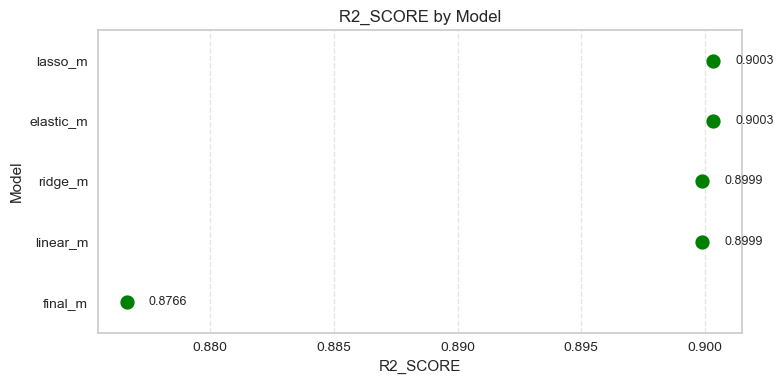

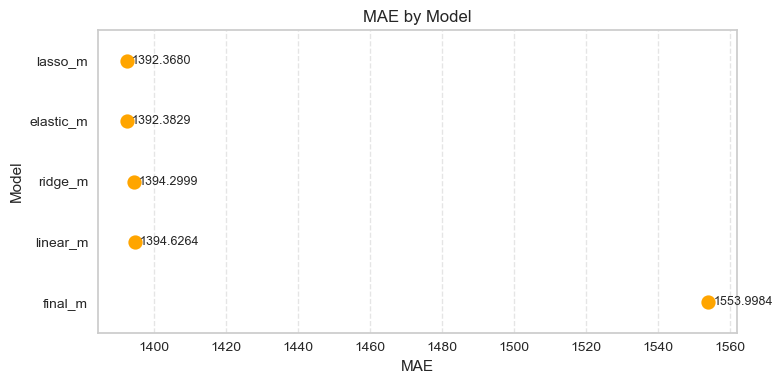

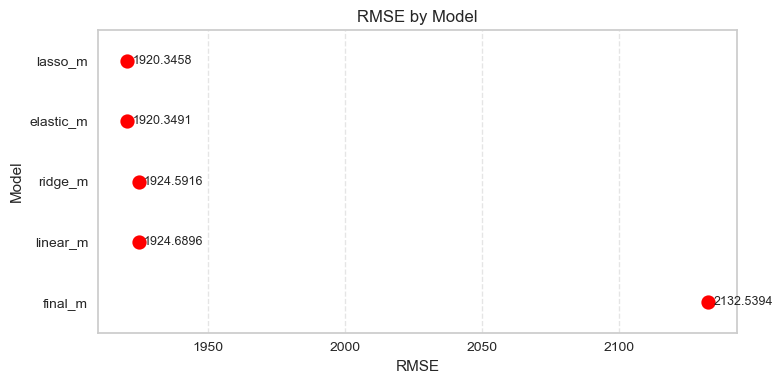

In [313]:
palette_colors = {
    "r2_score": "green",
    "mae": "orange",
    "rmse": "red"
}

for i, j in enumerate(scores):
    plt.figure(i, figsize=(8, 4))

    
    ascending = False if j == "r2_score" else True
    
    compare = scores.sort_values(by=j, ascending=ascending)

    
    ax = sns.pointplot(x=compare[j], y=compare.index, color=palette_colors[j], join=False)
    
    
    for idx, value in enumerate(compare[j]):
        ax.text(value + (0.001 * value), idx, f"{value:.4f}",
                va='center', ha='left', fontsize=9)

    plt.title(f"{j.upper()} by Model", fontsize=12)
    plt.xlabel(j.upper())
    plt.ylabel("Model")
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


<h1 style="text-align: center; color: #FF5733; font-size: 36px; font-family: 'Courier New', monospace;">
  Final Model
</h1>

In [316]:
final_scaler=MinMaxScaler()
final_scaler.fit(X)
X_scaled=final_scaler.transform(X)

In [318]:
lasso_model=Lasso()

param_grid={"alpha":alpha_space}

final_model=GridSearchCV(estimator=lasso_model,
                        param_grid=param_grid,
                        scoring="neg_root_mean_squared_error",
                        cv=10,
                        n_jobs=-1)

In [320]:
final_model.fit(X_scaled,y)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-02, 5.14949495e-01, 1.01989899e+00, 1.52484848e+00,
       2.02979798e+00, 2.53474747e+00, 3.03969697e+00, 3.54464646e+00,
       4.04959596e+00, 4.55454545e+00, 5.05949495e+00, 5.56444444e+00,
       6.06939394e+00, 6.57434343e+00, 7.07929293e+00, 7.58424242e+00,
       8.08919192e+00, 8.59414141e+00, 9.0990...
       3.83861616e+01, 3.88911111e+01, 3.93960606e+01, 3.99010101e+01,
       4.04059596e+01, 4.09109091e+01, 4.14158586e+01, 4.19208081e+01,
       4.24257576e+01, 4.29307071e+01, 4.34356566e+01, 4.39406061e+01,
       4.44455556e+01, 4.49505051e+01, 4.54554545e+01, 4.59604040e+01,
       4.64653535e+01, 4.69703030e+01, 4.74752525e+01, 4.79802020e+01,
       4.84851515e+01, 4.89901010e+01, 4.94950505e+01, 5.00000000e+01])},
             scoring='neg_root_mean_squared_error')

In [321]:
final_model.best_params_

{'alpha': 0.01}

In [322]:
final_model.best_estimator_

Lasso(alpha=0.01)

<h1 style="text-align: center; color: #FF5733; font-size: 36px; font-family: 'Courier New', monospace;">
  Prediction With New Observation
</h1>

In [327]:
my_dict = {
    "hp_kW": 100,
    "age": 4,
    "km": 64231,
    "make_model": 'Opel Insignia',
    "Gearing_Type": "Automatic"
}

In [329]:
my_dict=pd.DataFrame([my_dict])
my_dict

,hp_kW,age,km,make_model,Gearing_Type
0,100,4,64231,Opel Insignia,Automatic


In [331]:
my_dict=pd.get_dummies(my_dict)
my_dict

,hp_kW,age,km,make_model_Opel Insignia,Gearing_Type_Automatic
0,100,4,64231,True,True


In [333]:
X.sample()

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
13884,54.000,7.000,1.000,False,False,False,False,False,True,False,False,False,True,False


In [335]:
my_dict=my_dict.reindex(columns=X.columns,fill_value=0)
my_dict

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,100,64231,4,0,0,0,0,True,0,0,0,True,0,0


In [337]:
my_dict=final_scaler.transform(my_dict)
my_dict

array([[0.30150754, 0.20262145, 1.33333333, 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [339]:
final_model.predict(my_dict)

array([14652.58530496])

In [341]:
final_scaler=MinMaxScaler()
final_scaler.fit(X_train)
X_scaled=final_scaler.transform(X)

In [343]:
lasso_model=Lasso()

param_grid={"alpha":alpha_space}

final_model=GridSearchCV(estimator=lasso_model,
                                   param_grid=param_grid,
                                   scoring="neg_root_mean_squared_error",
                                   cv=10,
                                   n_jobs=-1)

In [345]:
final_model.fit(X_scaled,y)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-02, 5.14949495e-01, 1.01989899e+00, 1.52484848e+00,
       2.02979798e+00, 2.53474747e+00, 3.03969697e+00, 3.54464646e+00,
       4.04959596e+00, 4.55454545e+00, 5.05949495e+00, 5.56444444e+00,
       6.06939394e+00, 6.57434343e+00, 7.07929293e+00, 7.58424242e+00,
       8.08919192e+00, 8.59414141e+00, 9.0990...
       3.83861616e+01, 3.88911111e+01, 3.93960606e+01, 3.99010101e+01,
       4.04059596e+01, 4.09109091e+01, 4.14158586e+01, 4.19208081e+01,
       4.24257576e+01, 4.29307071e+01, 4.34356566e+01, 4.39406061e+01,
       4.44455556e+01, 4.49505051e+01, 4.54554545e+01, 4.59604040e+01,
       4.64653535e+01, 4.69703030e+01, 4.74752525e+01, 4.79802020e+01,
       4.84851515e+01, 4.89901010e+01, 4.94950505e+01, 5.00000000e+01])},
             scoring='neg_root_mean_squared_error')

In [346]:
final_model.best_estimator_

Lasso(alpha=0.01)

In [347]:
random_df=new_df.sample(20)

In [348]:
X_random=random_df.drop(columns="price")

In [349]:
X_random=final_scaler.transform(X_random)

In [355]:
preds=final_model.predict(X_random)
preds

array([26845.0032428 , 21661.46834439, 12480.18217176, 17298.72109244,
       22084.94567604, 25946.231803  , 23795.11560004, 16677.21397664,
        6024.57627103, 13469.1556855 , 21726.69085182, 23601.10033864,
       18390.80957059, 11128.48990139, 28588.29726076, 12650.28441368,
       22360.06746155, 22854.82699323, 17047.38171992, 17616.94710129])

In [357]:
actual=random_df["price"].values
actual

array([28140, 20900, 10940, 15900, 26900, 26900, 22890, 14495,  7800,
       11222, 21000, 22970, 14900, 10700, 32990, 11990, 22490, 22900,
       19500, 15500], dtype=int64)

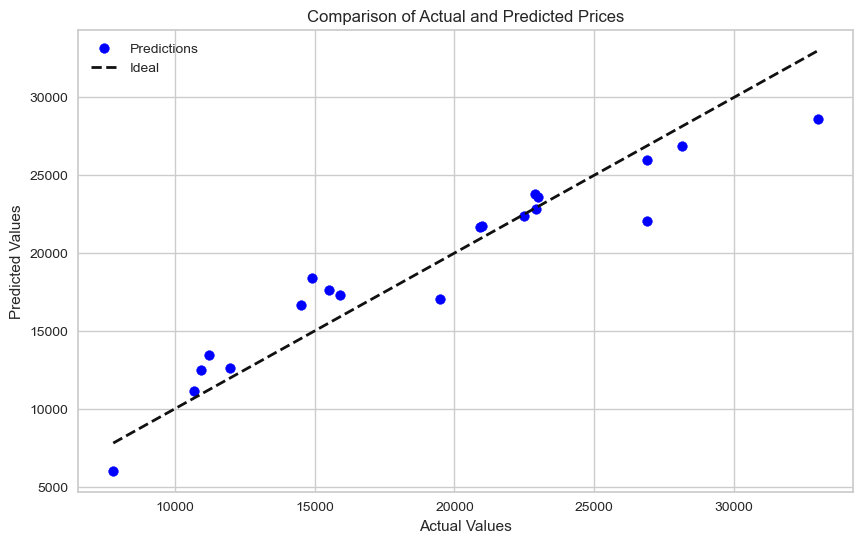

In [359]:
plt.figure(figsize=(10, 6))
plt.scatter(actual, preds, color='blue', label='Predictions')
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2, label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Actual and Predicted Prices')
plt.legend()
plt.show()


---

## 📌 Conclusion

In this project, we explored multiple regression algorithms to predict car prices using the AutoScout24 dataset. By applying linear and regularized models, evaluating them with error metrics and cross-validation, and performing feature importance analysis, we were able to build effective and interpretable models.

This study demonstrates how machine learning can be used to make accurate predictions in real-world scenarios — even with a pre-processed dataset. There is still room for improvement through more advanced preprocessing or model tuning, but this provides a strong foundation for further development.

Thank you for reading! 🚗💡
